In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5057,NCJ19,18.600,Low Fat,0.197809,Others,55.6588,OUT010,1998,NaN,Tier 3,Grocery Store,114.5176
5481,NCK54,12.150,Low Fat,0.029583,Household,114.7150,OUT045,2002,NaN,Tier 2,Supermarket Type1,1048.6350
3378,FDH38,6.425,Low Fat,0.010438,Canned,115.8808,OUT046,1997,Small,Tier 1,Supermarket Type1,1757.7120
176,FDB35,12.300,Regular,0.064750,Starchy Foods,92.6804,OUT045,2002,NaN,Tier 2,Supermarket Type1,1010.6844
1673,FDY51,12.500,Low Fat,0.081119,Meat,220.0798,OUT035,2004,Small,Tier 2,Supermarket Type1,1322.2788


In [5]:
data.shape

(8523, 12)

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.isnull().sum() #gives the no of null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
percent_null=data.isnull().sum()*100/len(data)
print(percent_null)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [9]:
data.duplicated().any()

False

In [10]:
data["Item_Weight"] #numerical column

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [11]:
data["Outlet_Size"] #categorical column

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [12]:
 mean_weight=data["Item_Weight"].mean()
 median_weight=data["Item_Weight"].median()

In [13]:
print(mean_weight)
print(median_weight)

12.857645184135976
12.6


In [14]:
data["Item_Weight_mean"]=data["Item_Weight"].fillna(mean_weight)
data["Item_Weight_median"]=data["Item_Weight"].fillna(median_weight)

In [15]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3


In [16]:
print(f"Original weight variance is {data["Item_Weight"].var()}")
print(f"Item weight variance after mean imputation is {data["Item_Weight_mean"].var()}")
print(f"Item weight variance after median imputation is {data["Item_Weight_median"].var()}")


Original weight variance is 21.56168825983637
Item weight variance after mean imputation is 17.860121735060453
Item weight variance after median imputation is 17.869561454073366


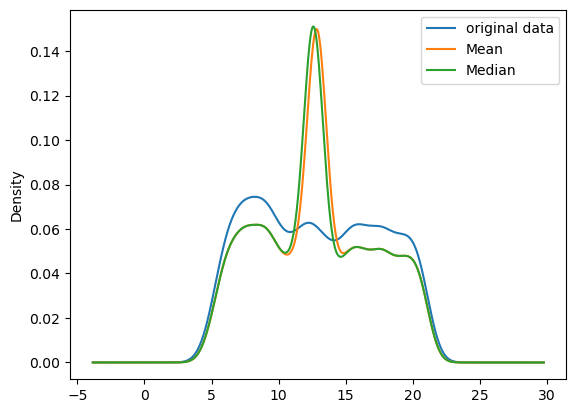

In [17]:
data["Item_Weight"].plot(kind="kde",label="original data")
data["Item_Weight_mean"].plot(kind="kde",label="Mean")
data["Item_Weight_median"].plot(kind="kde",label="Median")
plt.legend()
plt.show()

<Axes: >

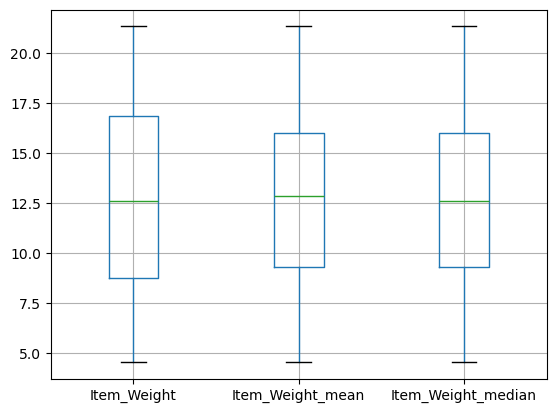

In [18]:
data[["Item_Weight","Item_Weight_mean","Item_Weight_median"]].boxplot()

In [19]:
data["Item_Weight_interpolate"]=data["Item_Weight"].interpolate(method="linear")

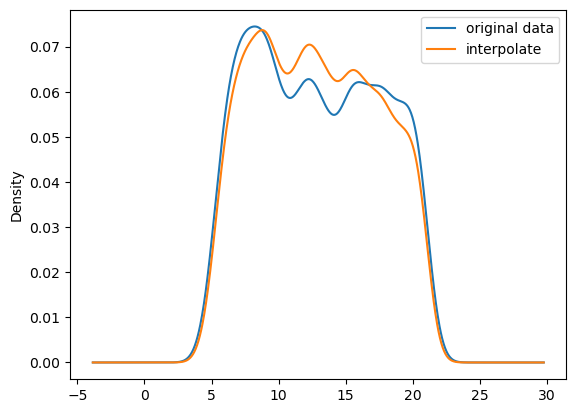

In [20]:
data["Item_Weight"].plot(kind="kde",label="original data")
data["Item_Weight_interpolate"].plot(kind="kde",label="interpolate")
plt.legend()
plt.show()
#it gives the nearest value compared to others as we have seen in graphs displayed

In [21]:
from sklearn.impute import KNNImputer

In [22]:
knn = KNNImputer(n_neighbors=10,weights="distance")

In [23]:
data["knn_imputer"] = knn.fit_transform(data[["Item_Weight"]]).ravel()

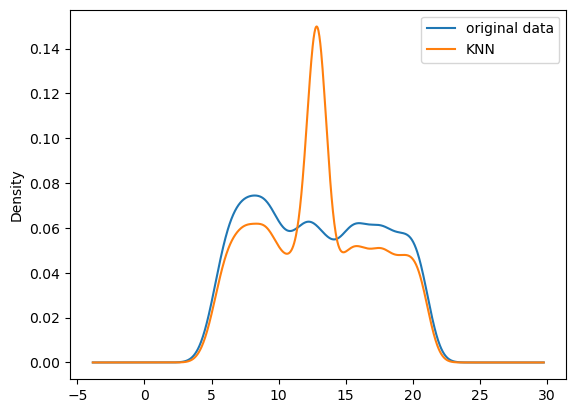

In [24]:
data["Item_Weight"].plot(kind="kde",label="original data")
data["knn_imputer"].plot(kind="kde",label="KNN")
plt.legend()
plt.show()

In [25]:
data = data.drop(["Item_Weight","Item_Weight_mean","Item_Weight_median","knn_imputer"],axis=1)

In [26]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [27]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interpolate         0
dtype: int64

In [28]:
#now fixing outlet_size

In [29]:
data["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [30]:
data["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [31]:
mode_outlet=data.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))

In [32]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [33]:
missing_values=data["Outlet_Size"].isnull()

In [34]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [35]:
data.loc[missing_values,"Outlet_Size"]=data.loc[missing_values,"Outlet_Type"].apply(lambda x:mode_outlet[x])

In [36]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
dtype: int64

In [37]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [38]:
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [39]:
data.replace({"Item_Fat_Content":{"Low Fat":"LF","low fat": "LF","reg":"Regular"}},inplace=True)

In [40]:
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

In [41]:
data["Item_Visibility"].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [42]:
data["Item_Visibility_interpolate"]=data["Item_Visibility"].replace(0,np.nan).interpolate(method="linear")

In [43]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [44]:
data["Item_Visibility_interpolate"].value_counts()

Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

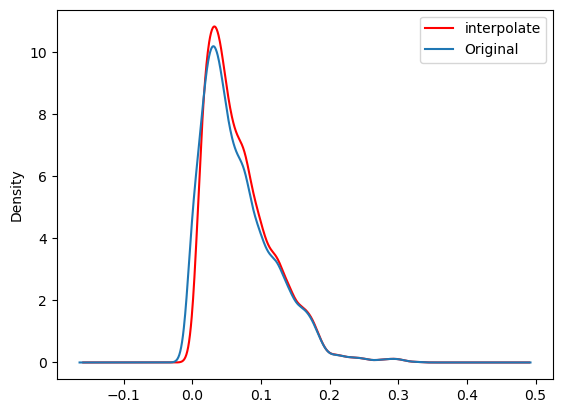

In [45]:
data["Item_Visibility_interpolate"].plot(kind="kde",label="interpolate",color="red")
data["Item_Visibility"].plot(kind="kde",label="Original")
plt.legend()
plt.show()

In [46]:
data=data.drop("Item_Visibility",axis=1)

In [47]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


In [48]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_interpolate'],
      dtype='object')

In [49]:
data["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [50]:
data["Item_Identifier"].value_counts().sample(5)

Item_Identifier
NCA18    4
NCW53    7
FDC21    5
FDE23    5
NCR50    4
Name: count, dtype: int64

In [51]:
data["Item_Identifier"]=data["Item_Identifier"].apply(lambda x: x[0:2])

In [52]:
data["Item_Identifier"].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [53]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_interpolate'],
      dtype='object')

In [54]:
data["Outlet_Establishment_Year"].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [55]:
import datetime as dt


In [56]:
current_year = dt.datetime.today().year

In [57]:
current_year

2024

In [58]:
data["Age_Outlet"]=current_year-data["Outlet_Establishment_Year"]

In [59]:
data=data.drop("Outlet_Establishment_Year",axis=1)

In [60]:
data.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Age_Outlet
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


In [61]:
#for handling categorical data convert categorical into numerical for ml models

In [62]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded=data.copy()

cat_cols=data.select_dtypes(include=["object"]).columns

for col in cat_cols:
    oe=OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)
    

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [63]:
data_encoded.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Age_Outlet
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25


In [64]:
X=data_encoded.drop("Item_Outlet_Sales",axis=1)
Y=data_encoded["Item_Outlet_Sales"]

In [65]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [66]:
#random forest regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf=RandomForestRegressor(n_estimators=100,random_state=42)
scores=cross_val_score(rf,X,Y,cv=5,scoring="r2")
print(scores.mean())

0.5549992903957147


In [67]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [68]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,Y,cv=5,scoring='r2')
print(scores.mean())

0.5956602202104594


In [69]:

xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,Y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.423386
10,Age_Outlet,0.169442
3,Item_MRP,0.160600
5,Outlet_Size,0.101296
4,Outlet_Identifier,0.099362
6,Outlet_Location_Type,0.036353
9,Item_Visibility_interpolate,0.003181
8,Item_Weight_interpolate,0.002475
2,Item_Type,0.002263
0,Item_Identifier,0.000967


In [70]:
final_data = X.drop(columns=['Item_Visibility_interpolate','Item_Weight_interpolate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)

In [71]:
final_data.sample(2)

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Age_Outlet
864,94.7120,7.0,2.0,1.0,22
2885,112.6886,2.0,2.0,1.0,17


In [72]:
from xgboost import XGBRFRegressor

In [73]:
xg_final = XGBRFRegressor()
xg_final.fit(final_data,Y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [75]:
X_train,X_test,y_train,y_test = train_test_split(final_data,Y,
                                                 test_size=0.20,
                                                 random_state=42)


In [76]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [77]:
y_pred = xg_final.predict(X_test)


In [78]:

mean_absolute_error(y_test,y_pred)

713.5792228647217

In [79]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]   #for random input
print(pred)

2058.0156


In [80]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")


Sales Value is between 1343.595625 and 2772.435625


In [81]:
#saving model

In [82]:
import joblib
joblib.dump(xg_final,'bigmart_model')

['bigmart_model']

In [83]:
model = joblib.load('bigmart_model')

In [84]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2058.0156


In [85]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")


Sales Value is between 1343.595625 and 2772.435625


In [86]:
import numpy as np
import datetime as dt
from tkinter import *
import joblib
from tkinter import font as tkfont

current_year = dt.datetime.today().year

def show_entry_fields():
    p1 = float(e1.get())
    
    text = clicked.get()
    outlet_identifiers = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']
    p2 = outlet_identifiers.index(text)
    
    text0 = clicked0.get()
    outlet_sizes = ['High', 'Medium', 'Small']
    p3 = outlet_sizes.index(text0)
    
    text1 = clicked1.get()
    outlet_types = ['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store']
    p4 = outlet_types.index(text1)
    
    p5 = current_year - int(e5.get())
    
    model = joblib.load('bigmart_model')
    result = model.predict(np.array([[p1, p2, p3, p4, p5]]))
    
    result_label.config(text=f"Sales Amount is between\n{result[0] - 714.42:.2f} and {result[0] + 714.42:.2f}")

# Initialize main window
master = Tk()
master.title("Big Mart Sales Prediction using Machine Learning")
master.configure(bg='#2c3e50')  # Set background color

# Custom fonts
title_font = tkfont.Font(family="Verdana", size=18, weight="bold")
label_font = tkfont.Font(family="Arial", size=12)
button_font = tkfont.Font(family="Arial", size=14, weight="bold")

# Title
Label(master, text="Big Mart Sales Prediction using ML", bg="#2c3e50", fg="white", font=title_font).grid(row=0, columnspan=2, pady=20)

# Labels and Entry fields
labels = ["Item MRP", "Outlet Identifier", "Outlet Size", "Outlet Type", "Outlet Establishment Year"]
for i, label_text in enumerate(labels, start=1):
    Label(master, text=label_text, bg="#2c3e50", fg="white", font=label_font).grid(row=i, column=0, sticky='e', padx=10, pady=10)

e1 = Entry(master, font=label_font, width=20)
e1.grid(row=1, column=1, padx=10, pady=10)

# Dropdown hover functions
def on_enter_dropdown(e, menu):
    menu.config(bg='#bdc3c7')  # Light gray on hover

def on_leave_dropdown(e, menu):
    menu.config(bg='#ffffff')  # Original white color when mouse leaves

# Dropdowns with hover effects
clicked = StringVar()
options = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']
e2 = OptionMenu(master, clicked, *options)
e2.config(width=15, font=label_font, bg='#ffffff', fg='#333333')
e2.grid(row=2, column=1, padx=10, pady=10)
e2.bind("<Enter>", lambda event: on_enter_dropdown(event, e2))
e2.bind("<Leave>", lambda event: on_leave_dropdown(event, e2))

clicked0 = StringVar()
options0 = ['High', 'Medium', 'Small']
e3 = OptionMenu(master, clicked0, *options0)
e3.config(width=15, font=label_font, bg='#ffffff', fg='#333333')
e3.grid(row=3, column=1, padx=10, pady=10)
e3.bind("<Enter>", lambda event: on_enter_dropdown(event, e3))
e3.bind("<Leave>", lambda event: on_leave_dropdown(event, e3))

clicked1 = StringVar()
options1 = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
e4 = OptionMenu(master, clicked1, *options1)
e4.config(width=15, font=label_font, bg='#ffffff', fg='#333333')
e4.grid(row=4, column=1, padx=10, pady=10)
e4.bind("<Enter>", lambda event: on_enter_dropdown(event, e4))
e4.bind("<Leave>", lambda event: on_leave_dropdown(event, e4))

e5 = Entry(master, font=label_font, width=20)
e5.grid(row=5, column=1, padx=10, pady=10)

# Button hover functions
def on_enter(e):
    predict_button['background'] = '#c0392b'  # Darker red on hover

def on_leave(e):
    predict_button['background'] = '#e74c3c'  # Original red when the mouse leaves

# Predict button with hover effect and rounder design
predict_button = Button(master, text='Predict', command=show_entry_fields, bg='#e74c3c', fg='white', font=button_font, 
                        padx=20, pady=10, bd=0, relief='flat')
predict_button.grid(row=6, column=0, columnspan=2, pady=20)

# Bind hover events to Predict button
predict_button.bind("<Enter>", on_enter)
predict_button.bind("<Leave>", on_leave)

# Result label
result_label = Label(master, text="", bg="#2c3e50", fg="white", font=label_font, wraplength=300)
result_label.grid(row=7, column=0, columnspan=2, pady=10)

# Set minimum window size
master.minsize(400, 600)

mainloop()
